<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
library(dplyr)
library(reshape2)
library(ggbeeswarm)
library(gridExtra)
library(gtable)
library(grid)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Functions

In [31]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [4]:
load(paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [5]:
load(paste0(datapath,"ESTIMATE/PDX_estimate.RData"))

In [6]:
PDX_estimate_itcc <- read.table(paste0(datapath, "ESTIMATE/ESTIMATE_output/RNAseq_itcc-P4_TPM_values_210726_estimateOutput.txt"),
                               sep = "\t", stringsAsFactors = F, header = T)

In [7]:
PDX_estimate_itcc <- PDX_estimate_itcc[grep(paste(c("EP", "MB", "HG", "NB", "RT"),collapse="|"),PDX_estimate_itcc$NAME),]

In [8]:
PDX_estimate_itcc <- PDX_estimate_itcc[grep(paste(c("PP", "PT", "PR", "PM"),collapse="|"),PDX_estimate_itcc$NAME),]

In [9]:
dim(PDX_estimate_itcc)

[1] 61  4

In [10]:
#remove
PDX_estimate_itcc <- PDX_estimate_itcc[!PDX_estimate_itcc$NAME %in% c("ITCC.P4_s07_HG0068_PT01_F01_R01_A03", "ITCC.P4_s15_NB0537_PT03_F01_R01_03"), ]

In [11]:
colnames(PDX_estimate_itcc)[1] <- "SampleID"

In [12]:
PDX_estimate <- rbind(PDX_estimate, PDX_estimate_itcc)

In [13]:
dim(PDX_estimate)

[1] 79  4

Subset for ImmuneScore and rbind pdx

In [16]:
mycol <- c("aliquot_id", "StromalScore", "ImmuneScore","ESTIMATEScore", "sample_id", "group", "cohort")

In [17]:
estimate_df <- estimate_manifest_primary_clean[,mycol]

add in PDX

In [18]:
summary(PDX_estimate$ImmuneScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2948   -2749   -2614   -2536   -2397   -1133 

In [19]:
PDX_estimate$group <- "PDX (ITCC)"
colnames(PDX_estimate)[1] <- "aliquot_id"
PDX_estimate$sample_id <- PDX_estimate$aliquot_id

In [21]:
PDX_estimate$cohort[ grepl("EP", PDX_estimate$sample_id)] <- "EPN"
PDX_estimate$cohort[ grepl("NB", PDX_estimate$sample_id)] <- "NBL"
PDX_estimate$cohort[ grepl("RT", PDX_estimate$sample_id)] <- "ATRT"
PDX_estimate$cohort[ grepl("HG", PDX_estimate$sample_id)] <- "pedHGG"
PDX_estimate$cohort[ grepl("MB", PDX_estimate$sample_id)] <- "MB"

PDX_estimate$cohort[ grepl("Med", PDX_estimate$sample_id)] <- "MB"
PDX_estimate$cohort[ grepl("Neo", PDX_estimate$sample_id)] <- "MB"
PDX_estimate$cohort[ grepl("XP",  PDX_estimate$sample_id)] <- "MB"

In [22]:
table(PDX_estimate$cohort)


  ATRT    EPN     MB    NBL pedHGG 
     2     10     43     14     10 

In [26]:
head(estimate_df)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,sample_id,group,cohort
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,TARGET-30-PAIFXV-01A-01R,-537.97880,483.8556,-54.1232,TARGET-30-PAIFXV-01A,TARGET,NBL
2,TARGET-30-PAIPGU-01A-01R,-319.22630,1240.6492,921.4229,TARGET-30-PAIPGU-01A,TARGET,NBL
3,TARGET-30-PAISNS-01A-01R,-899.30090,-128.2337,-1027.5347,TARGET-30-PAISNS-01A,TARGET,NBL
4,TARGET-30-PAITCI-01A-01R,-327.26820,200.6735,-126.5947,TARGET-30-PAITCI-01A,TARGET,NBL
5,TARGET-30-PAIVHE-01A-01R,-15.87499,1033.6469,1017.7719,TARGET-30-PAIVHE-01A,TARGET,NBL
6,TARGET-30-PAIXIF-01A-01R,460.15050,978.1672,1438.3177,TARGET-30-PAIXIF-01A,TARGET,NBL


In [23]:
estimate_ped_pdx <- rbind(estimate_df,PDX_estimate)

In [28]:
table(estimate_ped_pdx$group)


      CBTN       ICGC PDX (ITCC)     TARGET       TCGA 
       581        196         79        149       2452 

In [43]:
ped <- estimate_ped_pdx[ estimate_ped_pdx$group != "TCGA",]

In [44]:
tab <- as.data.frame(table(ped$cohort), stringsAsFactors = F)
tab <- tab[order(tab$Freq, decreasing = T),]

In [45]:
ped$cohort <- factor(ped$cohort, levels = tab$Var1)

In [46]:
ped$group <- factor(ped$group, levels = c("CBTN", "ICGC", "TARGET",
                                          "PDX (ITCC)"))

In [53]:
cancersplot <- ggplot(data = ped) + geom_bar(aes(y = cohort, fill = group)) + myaxis + myplot +
theme(axis.title = element_blank(), axis.text.x = element_text(size = 25, angle = 0, hjust = 0.5), 
      legend.position = c(0.8,0.9), legend.title = element_blank()) + scale_fill_manual(values = group_col)

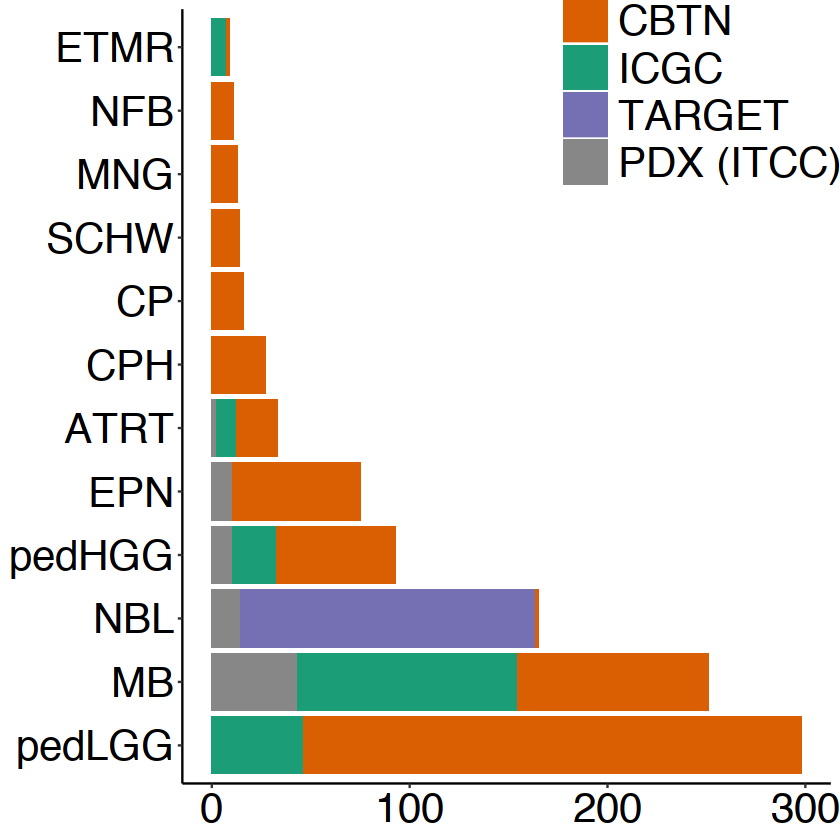

In [54]:
cancersplot

In [55]:
pdf(file = paste0(plotpath,"pedcancer_plot.pdf"),
    width = 10, height = 10, useDingbats = FALSE)
cancersplot
dev.off()

pdf 
  2